Loaded graph example_advogato
Loaded graph example_dblp-cite
Loaded graph example_gridkit-eupowergrid
Loaded graph example_pajek-erdos
example_pajek-erdos, AUC=121.93


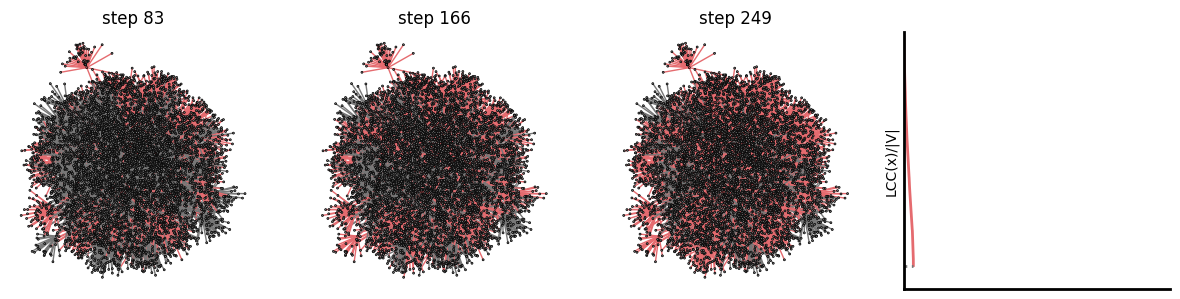

example_pajek-erdos: AUC=121.93063375198501
example_gridkit-eupowergrid, AUC=240.28


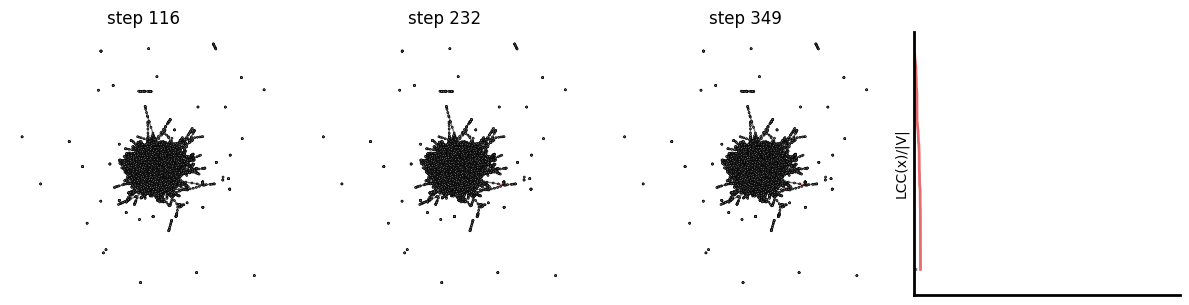

example_gridkit-eupowergrid: AUC=240.2832394298372
example_advogato, AUC=516.67


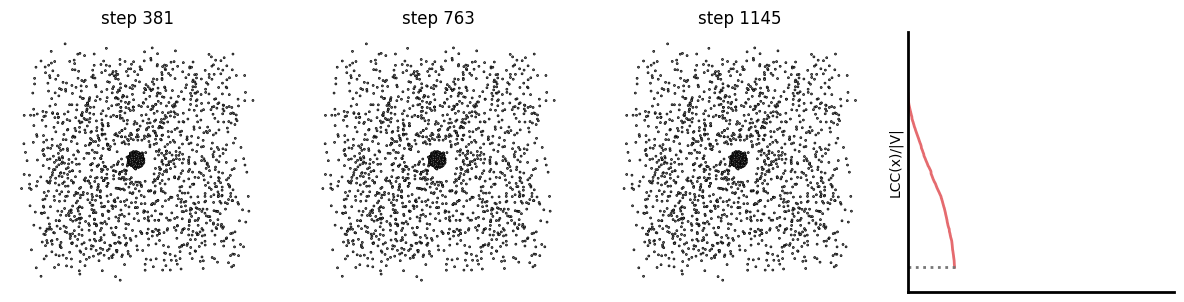

example_advogato: AUC=516.6663735535506
example_dblp-cite, AUC=1055.62


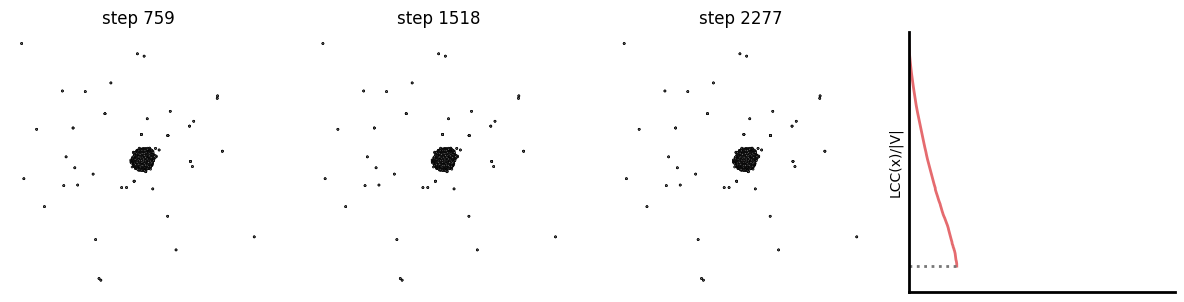

example_dblp-cite: AUC=1055.6191327138433


In [1]:
from env import DismantleEnv
from utils import validate
import torch

from networks.dismantle import SACPolicy

render = True

env = DismantleEnv('graphs/example', batch_size=5, is_val=True, render='plot')
# env = DismantleEnv('graphs/real/bio', batch_size=5, is_val=True, render='plot')

sac = SACPolicy(
    num_features=16,
    num_heads=4,
    num_mps=6,
).to(torch.device('cpu'))
sac.load_state_dict(torch.load('saved/mind.ckpt', weights_only=True)['policy_state_dict'])

auc_list = validate(env, sac)